# Reference Text
https://otexts.com/fpp2/arima-r.html

https://www.youtube.com/watch?v=DeORzP0go5I&t=539s

https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook

In [3]:
# !wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/SeaPlaneTravel.csv

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('SeaPlaneTravel.csv')

In [6]:
df.head()

Month  #Passengers
0  2003-01          112
1  2003-02          118
2  2003-03          132
3  2003-04          129
4  2003-05          121

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
# Date - Index & datetime format
df = pd.read_csv('SeaPlaneTravel.csv', parse_dates=['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df.set_index('Month',inplace=True)
df.head()

#Passengers
Month                  
2003-01-01          112
2003-02-01          118
2003-03-01          132
2003-04-01          129
2003-05-01          121

In [10]:
df.columns=['Passengers']

In [11]:
df.head()

Passengers
Month                 
2003-01-01         112
2003-02-01         118
2003-03-01         132
2003-04-01         129
2003-05-01         121

In [12]:
df.tail()

Passengers
Month                 
2015-08-01         606
2015-09-01         508
2015-10-01         461
2015-11-01         390
2015-12-01         432

<Axes: xlabel='Month'>

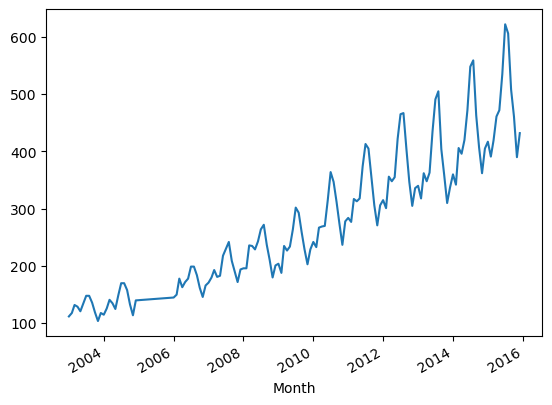

In [13]:
df['Passengers'].plot()
#lineplot

In [14]:
# Hypothesis Test
# Steps in Hypothesis Test
# Step 1 : Specify null and alternate hypothesis
# Step 2 : Choose the Hypothesis test
# Step 3 : calculate the p-value/critical value for the given dataset
# step 4 : check if p-value is greater than 0.05 (Null Hypothesis follows, else alternate Hypothesis follows)
# Step 5 : Describe if its Null hypothesis or alternate hypothesis follows

In [15]:
# adfuller test - to check for stationarity

# Step 1 : Null Hypothesis - given data is a non-stationary time series,
        # Alternate - given data is a stationary time series data
# Step 2 : adfuller test
# Step 3 : calulation of p-value
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Passengers'])
p_value = result[1]
print(f"p-value is : {p_value}")

if (p_value>0.05):
  print("The given time series is a - Non Stationary Time series (Null Hypothesis follows)")
else:
  print("The given time series is a - Stationary Time series (Alternate Hypothesis follows)")

p-value is : 0.9918802434376408
The given time series is a - Non Stationary Time series (Null Hypothesis follows)


In [16]:
result

(0.8153688792060371,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

image.png

In [17]:
# log transformation
result = adfuller(np.log(df['Passengers']))
p_value = result[1]
print(f"p-value is : {p_value}")

if (p_value>0.05):
  print("The given time series is a - Non Stationary Time series (Null Hypothesis follows)")
else:
  print("The given time series is a - Stationary Time series (Alternate Hypothesis follows)")

p-value is : 0.422366774770388
The given time series is a - Non Stationary Time series (Null Hypothesis follows)


In [18]:
# 1st order difference
result = adfuller((df['Passengers'].diff().dropna()))
p_value = result[1]
print(f"p-value is : {p_value}")

if (p_value>0.05):
  print("The given time series is a - Non Stationary Time series (Null Hypothesis follows)")
else:
  print("The given time series is a - Stationary Time series (Alternate Hypothesis follows)")

p-value is : 0.05421329028382792
The given time series is a - Non Stationary Time series (Null Hypothesis follows)


In [19]:
# 2nd order difference
result = adfuller((df['Passengers'].diff().diff().dropna()))
p_value = result[1]
print(f"p-value is : {round(p_value,2)}")

if (p_value>0.05):
  print("The given time series is a - Non Stationary Time series (Null Hypothesis follows)")
else:
  print("The given time series is a - Stationary Time series (Alternate Hypothesis follows)")

p-value is : 0.0
The given time series is a - Stationary Time series (Alternate Hypothesis follows)


In [20]:
# Convert the Non- Stationary time series to Stationary Time series

In [21]:

# Module to create ACF and PACF plots
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
# Creating two subplots to show ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

# Creating and plotting the ACF charts starting from lag = 1
tsaplots.plot_acf(df['Passengers'].diff().diff().dropna(), zero = False, ax = ax1)

# Creating and plotting the ACF charts starting from lag = 1 till lag = 8
tsaplots.plot_pacf(df['Passengers'].diff().diff().dropna(), zero = False, ax = ax2, lags = 8)

plt.show()

/Users/nachiketh/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


In [22]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 9.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [23]:
import pmdarima as pm
pm.auto_arima(df['Passengers'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [24]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df['Passengers'],order=(4,1,3))
result = model.fit()

/Users/nachiketh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nachiketh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nachiketh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nachiketh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameter

In [25]:
print(f"Next forecast is : {result.forecast()}")

Next forecast is : 144    467.573901
dtype: float64


/Users/nachiketh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [26]:
len(df)

144

In [27]:
result.predict(144,155)

/Users/nachiketh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


144    467.573901
145    490.494756
146    509.137139
147    492.554920
148    495.306027
149    475.947798
150    476.339813
151    475.552124
152    472.353862
153    483.889740
154    475.570287
155    485.921633
Name: predicted_mean, dtype: float64

In [28]:
df['Passengers'].head()

Month
2003-01-01    112
2003-02-01    118
2003-03-01    132
2003-04-01    129
2003-05-01    121
Name: Passengers, dtype: int64

In [29]:
df['Passengers'].diff().head()

Month
2003-01-01     NaN
2003-02-01     6.0
2003-03-01    14.0
2003-04-01    -3.0
2003-05-01    -8.0
Name: Passengers, dtype: float64

In [30]:
df['Passengers'].diff().diff().head()

Month
2003-01-01     NaN
2003-02-01     NaN
2003-03-01     8.0
2003-04-01   -17.0
2003-05-01    -5.0
Name: Passengers, dtype: float64